In [12]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot


# for pretty plotting
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

In [16]:
rio = pd.read_csv('data/mobility_rio_final.csv')
ratio = pd.read_csv('data/mobility_ratios.csv')

In [14]:
favelas = rio[rio['type'] == 'favela']
formal = rio[rio['type'] == 'formal']

In [15]:
rio.head()

,cod_sector_start,Cod_bairro,type,group,Nome_do_bairro,travel_time_am,walk_time,mode_switches,price,avg_income,tot_residents
0,330455705380001,3304557084,favela,a,Cidade de Deus,106,4,3,15.0,532.60,36515
1,330455705210174,3304557089,formal,a,Tanque,66,4,2,7.9,934.48,31163
2,330060530000001,330060530,favela,b,Serrinha,70,13,2,7.2,386.84,503
3,330455705200085,3304557072,formal,b,Cascadura,54,2,1,3.6,904.23,32024
4,330455705110286,3304557024,favela,c,Vidigal,68,9,2,7.9,691.59,10464


In [22]:
# create % walk time
rio['walk_per'] = rio['walk_time']/rio['travel_time_am']

# create weekly cost (5 rides) 
rio['wkly_cost_am'] = rio['price']*5

# create % income for 5 rides
rio['income_per'] = rio['wkly_cost_am']/rio['avg_income']

# creating mobility score (raw)
rio['mobility_score'] = rio['travel_time_am']*rio['income_per']+rio['walk_per']


In [49]:
# finding averages for normalizing data within these neighborhood pairs
avg_walk_per = rio.walk_per.mean()
avg_travel_time_am = rio.travel_time_am.mean()
avg_income_per = rio.income_per.mean()
norm_key = avg_travel_time_am*avg_income_per+avg_walk_per

# calculating avg for favelas and formal communities
favelas = rio[rio['type'] == 'favela']
formal = rio[rio['type'] == 'formal']             
fav_norm = favelas.travel_time_am.mean()*favelas.income_per.mean()+favelas.walk_per.mean()
form_norm = formal.travel_time_am.mean()*formal.income_per.mean()+formal.walk_per.mean()              

rio['mobility_score_norm'] = rio['mobility_score']/norm_key

print (fav_norm)
print (form_norm)
print (norm_key)


6.247028579709313
1.0351783059643087
3.2493303578461625


In [51]:
# some comparisons between communities
print ("Favela Avg mode switches: %s" % (favelas.mode_switches.mean()))
print ("Formal Avg mode switches: %s" % (formal.mode_switches.mean())) \

print ("Favela percent income (5 rides): %s" % (favelas.income_per.mean()))
print ("Formal percent income (5 rides): %s" % (formal.income_per.mean()))

Favela Avg mode switches: 2.25
Formal Avg mode switches: 1.5
Favela percent income (5 rides): 0.07843570827247794
Formal percent income (5 rides): 0.01873695246437913


In [50]:
# includes mobility score, and normalized mobility score
rio.head()

,cod_sector_start,Cod_bairro,type,group,Nome_do_bairro,travel_time_am,walk_time,mode_switches,price,avg_income,tot_residents,walk_per,wkly_cost_am,income_per,mobility_score,mobility_score_norm
0,330455705380001,3304557084,favela,a,Cidade de Deus,106,4,3,15.0,532.60,36515,0.037736,75.0,0.140819,14.964510,4.605414
1,330455705210174,3304557089,formal,a,Tanque,66,4,2,7.9,934.48,31163,0.060606,39.5,0.042269,2.850393,0.877225
2,330060530000001,330060530,favela,b,Serrinha,70,13,2,7.2,386.84,503,0.185714,36.0,0.093062,6.700035,2.061974
3,330455705200085,3304557072,formal,b,Cascadura,54,2,1,3.6,904.23,32024,0.037037,18.0,0.019906,1.111985,0.342220
4,330455705110286,3304557024,favela,c,Vidigal,68,9,2,7.9,691.59,10464,0.132353,39.5,0.057115,4.016157,1.235995


In [52]:
# new df for visualizations
mobility_by_city = rio [['Nome_do_bairro', 'mobility_score_norm', 'type', 'group']]
mobility_by_city

,Nome_do_bairro,mobility_score_norm,type,group
0,Cidade de Deus,4.605414,favela,a
1,Tanque,0.877225,formal,a
2,Serrinha,2.061974,favela,b
3,Cascadura,0.342220,formal,b
4,Vidigal,1.235995,favela,c
5,Leblon,0.052539,formal,c
6,Rocinha,0.542543,favela,d
7,Gávea,0.185229,formal,d


In [53]:
# look at just travel times
rio_travtimes = rio [['group', 'type', 'Nome_do_bairro', 'travel_time_am',]]
rio_travtimes

,group,type,Nome_do_bairro,travel_time_am
0,a,favela,Cidade de Deus,106
1,a,formal,Tanque,66
2,b,favela,Serrinha,70
3,b,formal,Cascadura,54
4,c,favela,Vidigal,68
5,c,formal,Leblon,34
6,d,favela,Rocinha,67
7,d,formal,Gávea,52


In [21]:
rio_short = rio[['Nome_do_barrio', 'travel_time_am', 'walk_per', 'mode_switches', 'price', ]]

,cod_sector_start,Cod_bairro,type,group,Nome_do_bairro,travel_time_am,walk_time,mode_switches,price,avg_income,tot_residents
0,330455705380001,3304557084,favela,a,Cidade de Deus,106,4,3,15.0,532.60,36515
1,330455705210174,3304557089,formal,a,Tanque,66,4,2,7.9,934.48,31163
2,330060530000001,330060530,favela,b,Serrinha,70,13,2,7.2,386.84,503
3,330455705200085,3304557072,formal,b,Cascadura,54,2,1,3.6,904.23,32024
4,330455705110286,3304557024,favela,c,Vidigal,68,9,2,7.9,691.59,10464
5,330455705110140,3304557020,formal,c,Leblon,34,1,1,4.3,5173.23,43916
6,330455705330001,3304557156,favela,d,Rocinha,67,16,2,4.3,945.15,69356
7,330455705110259,3304557023,formal,d,Gávea,52,8,2,7.2,4178.34,14606


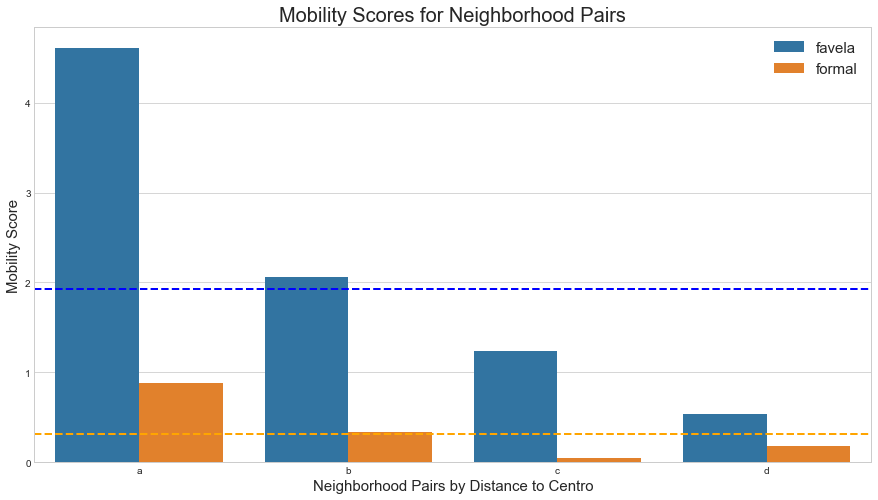

In [11]:
# source: https://seaborn.pydata.org/generated/seaborn.barplot.html

fig, ax = pyplot.subplots(figsize=(15,8))
ax = sns.barplot(x="group", y="mobility_score_norm", hue="type", data=mobility_by_city)

plt.title('Mobility Scores for Neighborhood Pairs' ,fontsize=20)
plt.xlabel('Neighborhood Pairs by Distance to Centro', fontsize=15)
plt.ylabel('Mobility Score', fontsize=15)
plt.legend(fontsize=15)

# plotting averages for two groups
plt.axhline(fav_norm/norm_key, color='blue', linestyle='dashed', linewidth=2)
plt.axhline(form_norm/norm_key, color='orange', linestyle='dashed', linewidth=2)


In [20]:
ratio

,neighborhood_pair,favela,formal,ratio
0,Cidade de Deus - Tanque,4.605414,0.877225,5.249980
1,Serrinha - Cascadura,2.061974,0.342220,6.025288
2,Vidigal - Leblon,1.235995,0.052539,23.525286
3,Rocinha - Gávea,0.542543,0.185229,2.929039


In [ ]:
# geopandas to map spatially coming soon! 